### IIIT-B & UpGrad Project
#### Linear Regression of bike user data

#### Data Set Description
- The data set contains 730 rows and 16 columns of data given by American bike sharing company.
- This data represent the users of bike sharing service **Boom-Bikes**
- The variables are mostly the weather situation, meterological data and period of use by different users.

#### Problem Statement
- Based on the factors available the company wants to:
    - Understand which are the variables that impact use of bikes.
    - How well those variables explain the demand for bikes.

#### Bussiness Goal
- To create the model using the given variables to predict the user demand for bikes

#### Project Approach
- Split data into train and test.
    - Split is carried out initially to create a test set to mimic unknown data.
    - Ration of train and test set is 70:30
    - Random state is set at 100
    - Nomenclature
        - Train set : **b_train**
        - Test set  : **b_test**
- Pre Process Data
    - Deal with missing data
    - Deal with unique data
    - Deal with duplicate data
    - Deal with datatypes
    - Deal with redundant data
- Outlier Detection
- EDA
    - Check for linear relations.
    - Check for multicolinearity.
    - Feature engineering
- Model Creation
    - Model creation steps
        - Deducing important features
        - Creating X and y
        - Scaling numeriacl variables
        - Creating dummy variables
    - create linear regression models
        - Using **sklearn**
        - Using **statsmodel.api**
            - Use P Value and VIF for feature selection
- Evaluate model performance
    - Select best model
- Predict values on Test Set


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression # LinearRegresion is a class as L and R are in upper case
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#### Loading Data
- Data is loaded into a dataframe name **bike**
- Data is given traken from the link given in the project page.

In [2]:
# Loading Data 
bike = pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')
bike.shape

(730, 16)

#### Split the data into train and test set
- Spliting is done at the begining to mimic real life scenarios where test data is unseen.
- Ratio of train and test is 70:30
- Random state is set at 100
- Random seed is set at 0
- Nomenclature
    - Train set : b_train
    - Test set  : b_test

In [3]:
# Spliting of dataframe

np.random.seed(0)
b_train, b_test = train_test_split(bike, train_size=0.70,random_state=100)
print("Shape of train set  :", b_train.shape)
print("Shape of test set  :", b_test.shape)

Shape of train set  : (510, 16)
Shape of test set  : (220, 16)


#### Pre processing Train Set

In [4]:
b_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     510 non-null    int64  
 1   dteday      510 non-null    object 
 2   season      510 non-null    int64  
 3   yr          510 non-null    int64  
 4   mnth        510 non-null    int64  
 5   holiday     510 non-null    int64  
 6   weekday     510 non-null    int64  
 7   workingday  510 non-null    int64  
 8   weathersit  510 non-null    int64  
 9   temp        510 non-null    float64
 10  atemp       510 non-null    float64
 11  hum         510 non-null    float64
 12  windspeed   510 non-null    float64
 13  casual      510 non-null    int64  
 14  registered  510 non-null    int64  
 15  cnt         510 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 67.7+ KB


In [5]:
b_train.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
b_train.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,510.0,368.680392,209.596164,1.000000,187.250000,373.000000,552.750000,729.000000
season,510.0,2.513725,1.110235,1.000000,2.000000,3.000000,3.000000,4.000000
yr,510.0,0.507843,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,510.0,6.541176,3.465416,1.000000,3.000000,7.000000,10.000000,12.000000
holiday,510.0,0.025490,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,510.0,2.990196,2.017093,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,510.0,0.676471,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,510.0,1.403922,0.547888,1.000000,1.000000,1.000000,2.000000,3.000000
temp,510.0,20.108257,7.431626,2.424346,13.606865,20.277923,26.615847,35.328347
atemp,510.0,23.500287,8.090963,3.953480,16.603063,24.131150,30.177700,42.044800


In [7]:
# Checking for duplicate values and dropping values if any
b_train.drop_duplicates(subset=None, inplace=True)
b_train.shape

(510, 16)

#### Observations
- Dataset contains 510 rows and 1
- There are no missing values
- Categorical values are numerically represented in following columns and need conversion to string:
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit
- Cnt is sum of casual and registered
    - Only total user count is needed for analysis and model creation
- dteday is in object format and is not needed as the month and year is already seperated.
- instant is the serial order and can be deleted
- There are no duplicates in the dataframe.
- Remane colums for better understanding
- Reorder columns for better understanding

In [8]:
# Deleting redundant colums
b_train = b_train.drop(['instant','dteday','casual','registered'], axis = 1)

In [9]:
# Reordering columns
neworder = ['mnth','yr','season', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt', ]
b_train=b_train.reindex(columns=neworder) 

In [10]:
b_train.rename(columns={'mnth':'month','yr':'year','weathersit':'weather_sit','atemp':'felt_temp','hum':'humidity',
                        'cnt':'total_user'},inplace=True)

In [11]:
# Changing datatypes of numerically represented categorical columns
b_train['season']=b_train['season'].astype('category')
b_train['weather_sit']=b_train['weather_sit'].astype('category')
b_train['month']=b_train['month'].astype('category')
b_train['weekday']=b_train['weekday'].astype('category')

#### Outlier Detection
- Use box plot to detect any outliers
- Use IQR to remove any outliers if present

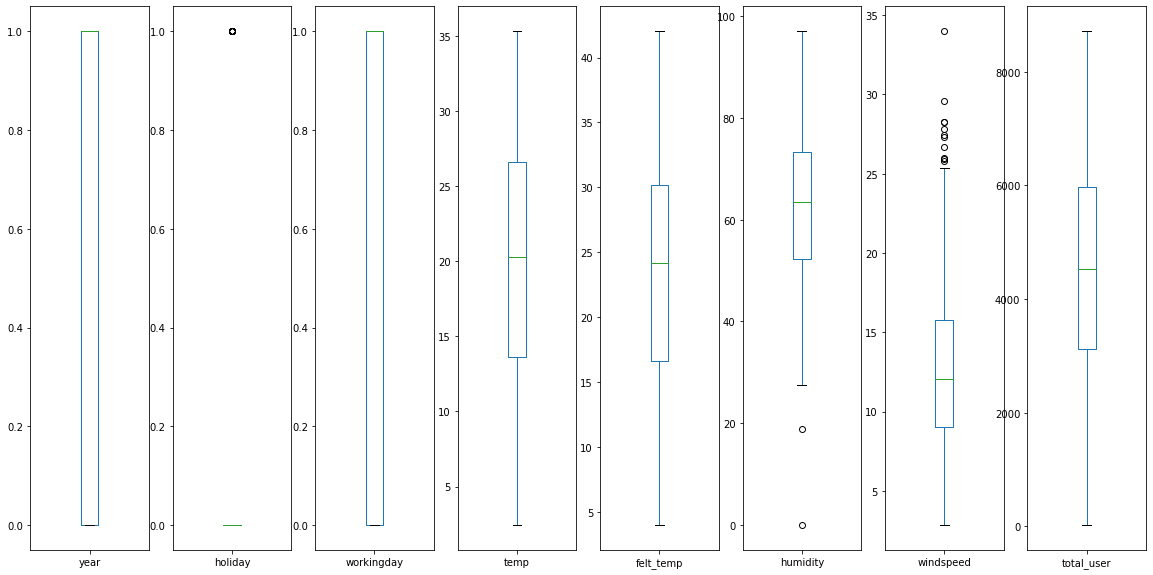

In [12]:
# Using Box Plot to find outliers if any
b_train.plot(kind='box', subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='windspeed'>

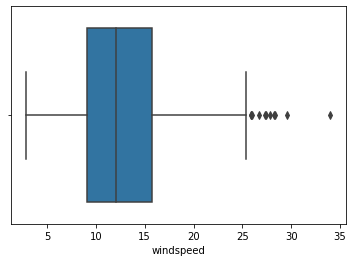

In [13]:
sns.boxplot(x = 'windspeed', data = b_train)

#### Observation
- Only Windspeed and humidity has few outliers
- Windspeed
    - Windspeed of 34 kmph is possible.
    - Not removed or replaced
- Humidity 
    - Has value 0, which is not likely 
    - Replaced by mean


#### Correcting Outliers

In [14]:
# Locating rows where humidity = 0
b_train.loc[b_train.humidity == 0.0]

,month,year,season,holiday,weekday,workingday,weather_sit,temp,felt_temp,humidity,windspeed,total_user
68,3,0,1,0,4,1,3,15.952731,19.2834,0.0,17.545759,623


In [15]:
# Replacing 0 value with mean of humidity.
# Mean and median are close 
b_train.loc[b_train.humidity == 0.0, 'humidity'] = b_train['humidity'].mean()

### EDA
- Exploring Categorical Data
    - Value counts
    - Distribution
- Exploring numerical data
    - Check distribution
    - Check 

#### Exploring Categorical data

<AxesSubplot:title={'center':'Year wise data'}>

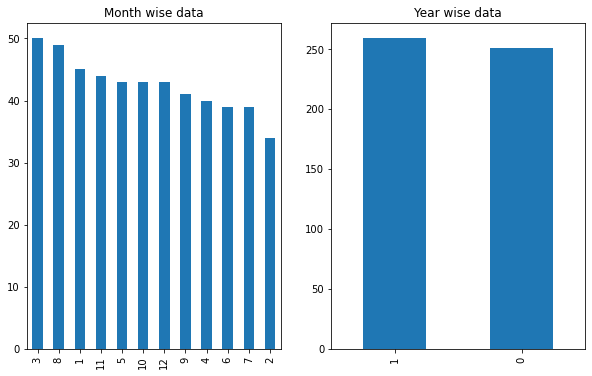

In [16]:
f, ax = plt.subplots(1,2, figsize=(10,6))
b_train['month'].value_counts().sort_values(ascending= False).plot(kind='bar', ax = ax[0], title = 'Month wise data',)
b_train['year'].value_counts().plot(kind='bar', ax = ax[1], title = 'Year wise data')

<AxesSubplot:ylabel='workingday'>

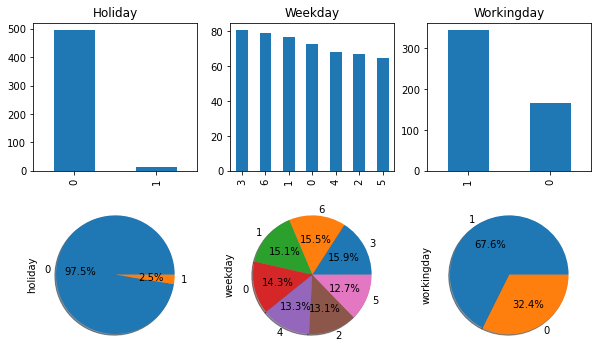

In [17]:
f, ax = plt.subplots(2,3, figsize=(10,6))
b_train['holiday'].value_counts().sort_values(ascending= False).plot(kind='bar', ax = ax[0,0], title = 'Holiday',)
b_train['weekday'].value_counts().plot(kind='bar', ax = ax[0,1], title = 'Weekday')
b_train['workingday'].value_counts().plot(kind='bar', ax = ax[0,2], title = 'Workingday')
b_train['holiday'].value_counts().plot.pie(ax = ax[1,0],autopct='%1.1f%%',shadow=True)
b_train['weekday'].value_counts().plot.pie(ax = ax[1,1],autopct='%1.1f%%',shadow=True)
b_train['workingday'].value_counts().plot.pie(ax = ax[1,2],autopct='%1.1f%%',shadow=True)

In [18]:
b_train['year'].value_counts()

1    259
0    251
Name: year, dtype: int64

In [19]:
b_train['holiday'].value_counts()

0    497
1     13
Name: holiday, dtype: int64

In [20]:
b_train['weekday'].value_counts()

3    81
6    79
1    77
0    73
4    68
2    67
5    65
Name: weekday, dtype: int64

In [21]:
b_train['workingday'].value_counts()

1    345
0    165
Name: workingday, dtype: int64

In [22]:
b_train['weather_sit'].value_counts()

1    319
2    176
3     15
Name: weather_sit, dtype: int64

#### Observations
- Both years have similar user count
- Holiday, working day and month has effect on users
- Though diffrences exist between use on each day its not very significant

#### Exploring Numerialc Data

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

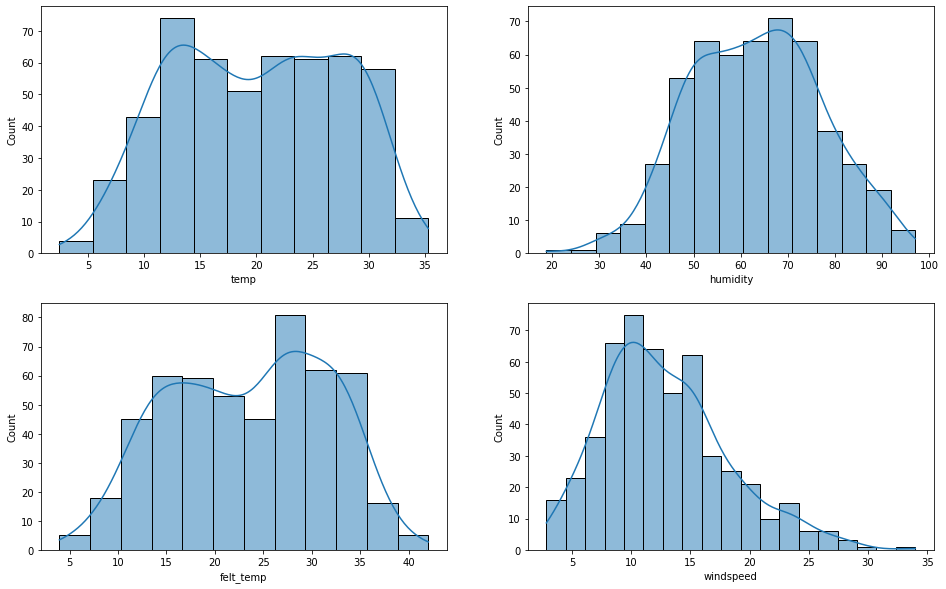

In [23]:
f, ax = plt.subplots(2,2, figsize=(16,10))

sns.histplot(data=b_train, x="temp", palette ='rainbow', kde=True, ax=ax[0,0])
sns.histplot(data=b_train, x="felt_temp", palette ='rainbow', kde=True, ax=ax[1,0])
sns.histplot(data=b_train, x="humidity", palette ='rainbow', kde=True, ax=ax[0,1])
sns.histplot(data=b_train, x="windspeed", palette ='rainbow', kde=True, ax=ax[1,1])


#### Observations
- The numerical data are nearly normally distributed.
- They are within limits of possible occurances

#### Checking Linear Relations

<AxesSubplot:xlabel='weather_sit', ylabel='total_user'>

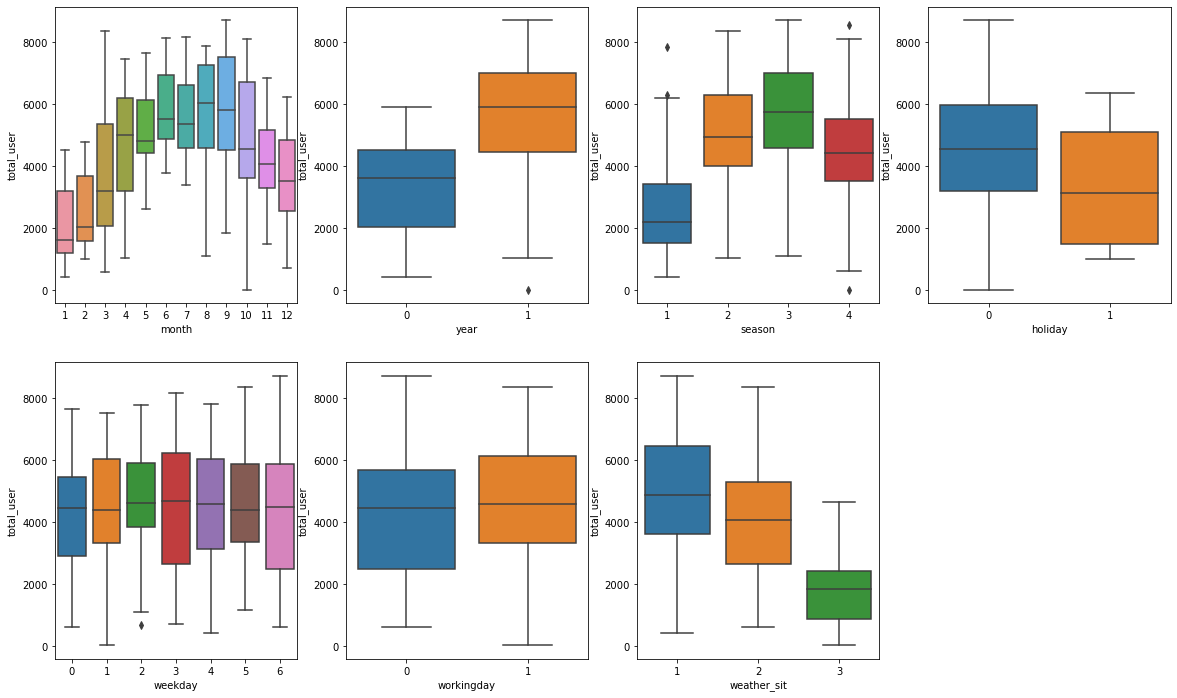

In [24]:
# Visualise categorical variable
# Good way to visiualize relation between a categorial var and a continious var is a box plot
plt.figure(figsize = (20,12))
plt.subplot(2,4,1)
sns.boxplot(x = 'month', y ='total_user', data = b_train)

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y ='total_user', data = b_train)

plt.subplot(2,4,3)
sns.boxplot(x = 'season', y ='total_user', data = b_train)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y ='total_user', data = b_train)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y ='total_user', data = b_train)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y ='total_user', data = b_train)

plt.subplot(2,4,7)
sns.boxplot(x = 'weather_sit', y ='total_user', data = b_train)

#### Observations
- Linear correlation is clearly visible between user count and follwoing variables
    - weather_sit
    - year
    - season
    - holiday
- Weekday does not seem to impact user cound to a significant degree.

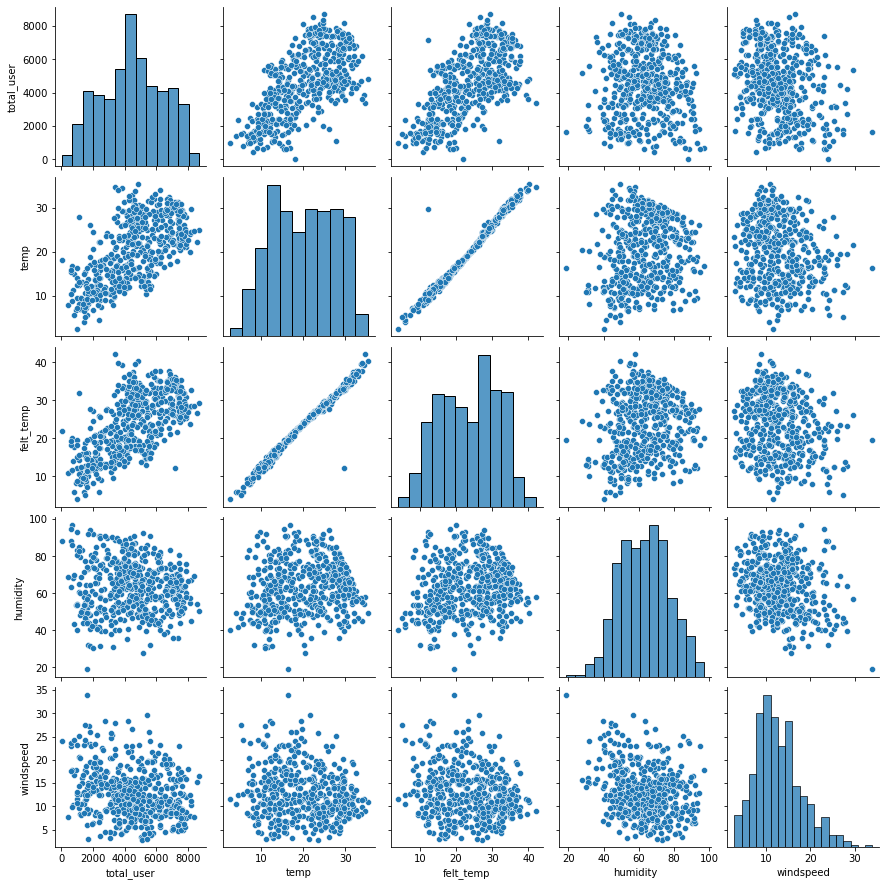

In [25]:
sns.pairplot(b_train,
    x_vars=['total_user',"temp", "felt_temp", "humidity", 'windspeed'],
    y_vars=["total_user","temp", "felt_temp", "humidity", 'windspeed'])

plt.show()

#### Observations
- Temp and felt_temp has clear linear relation with user count.
- Felt temp and temp are highly correlated
- Not much linear correlation exists between user count and windspeed 
- Not much linear correlation exists between user count and humidity.

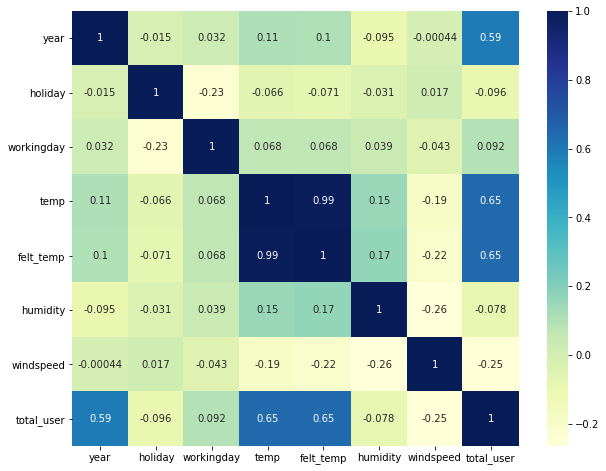

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 8))
sns.heatmap(b_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations
- Felt temp and temp are highly correlated cleatrly indicating multicolinearity.
- Hence felt_temp may be dropped before model creation

In [27]:
# Deleting colum 'felt_temp'
b_train = b_train.drop('felt_temp', axis = 1)

#### Model Creation Train set

#### Create X and y of train set

In [28]:
# Create X and y
y_train = b_train.pop('total_user') # Create a series for y_train
X_train = b_train # pop will remove 'total_user' inplace from df_train and leave us with X_train
print('Shape of y_train :',y_train.shape)
print('Shape of X_train :',X_train.shape)
X_train.head(2)

Shape of y_train : (510,)
Shape of X_train : (510, 10)


,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed
576,7,1,3,0,2,1,1,29.246653,70.4167,11.083475
426,3,1,1,0,6,0,2,16.980847,62.1250,10.792293


#### Scaling train set

In [29]:
# Scaling numerical variables of X_train

# Intasiate the object
scaler = MinMaxScaler()

# Create list of numeric variables
num_vars = ['temp','humidity', 'windspeed']

#fit and transform
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed
576,7,1,3,0,2,1,1,0.815169,0.659744,0.264686
426,3,1,1,0,6,0,2,0.442393,0.553780,0.255342
728,12,1,1,0,0,0,1,0.245101,0.377528,0.663106
482,4,1,2,0,6,0,2,0.395666,0.385516,0.188475
111,4,0,2,0,5,1,2,0.345824,0.692225,0.380981


#### Creating dummy variables for X_train
- Call it X_train_d

In [30]:
X_train_d =pd.get_dummies(X_train, drop_first=True)
X_train_d.head(2)

,year,holiday,workingday,temp,humidity,windspeed,month_2,month_3,month_4,month_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_sit_2,weather_sit_3
576,1,0,1,0.815169,0.659744,0.264686,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.553780,0.255342,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [31]:
b_train.head(2)

,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed
576,7,1,3,0,2,1,1,0.815169,0.659744,0.264686
426,3,1,1,0,6,0,2,0.442393,0.553780,0.255342


#### First Model Train Set using sklearn: lr_sk_1
- Use all variables in X_train_d
- model is called lr_sk_1

In [32]:
lr_sk_1 = LinearRegression()
lr_sk_1.fit(X_train_d,y_train) #calculation of b0 and b1
y_train_pred_sk_1 = lr_sk_1.predict(X_train_d) # predicting the total users in train set

#### Selecting Features using RFE
- Create rfe
- use 15 variables that is 50% of total variables in X_train_d

In [33]:
from sklearn.feature_selection import RFE

In [34]:
# Running RFE with the output number of the variable equal to 15 (50% of Columns)
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_d, y_train)

rfe = RFE(lr_rfe, 15)             # running RFE
rfe = rfe.fit(X_train_d, y_train)

In [35]:
# Extracting cols with rfe support
col = X_train_d.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_8', 'month_9', 'month_10', 'season_2', 'season_3', 'season_4',
       'weekday_6', 'weather_sit_2', 'weather_sit_3'],
      dtype='object')

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train_d[col]
X_train_rfe.head(2)

,year,holiday,workingday,temp,humidity,windspeed,month_8,month_9,month_10,season_2,season_3,season_4,weekday_6,weather_sit_2,weather_sit_3
576,1,0,1,0.815169,0.659744,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.553780,0.255342,0,0,0,0,0,0,1,1,0


#### Model using statsmodel.api

#### Second Model: lr_sm_1
- First model using statsmodel
- X_train_rfe to be converted to X_train_rfe_1 by adding constant

In [37]:
import statsmodels.api as sm
# Adding coefficient to the existing columns
X_train_rfe_1 = sm.add_constant(X_train_rfe)
# Create the 
lr_sm_1 = sm.OLS(y_train, X_train_rfe_1).fit()

In [38]:
lr_sm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_user   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.80e-191
Time:                        09:12:24   Log-Likelihood:                -4106.5
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     494   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1476.8056    212.241      6.958      0.000    1059.799    1893.812
year           1995.2072     69.767     28.598      0.000    1858.131    2132.284
holiday        -474.6999    233.880     -2.030      0.043    -934.223     -15.177
workingday      386.2370    100.272      3.852      0.000     189.225     583.249
temp           4361.8308    294.056     14.833      0.000    3784.077    4939.585
humidity      -1218.2749    278.962     -4.367      0.000   -1766.374    -670.176
windspeed     -1602.2551    221.728     -7.226      0.000   -2037.902   -1166.609
month_8         416.0693    150.584      2.763      0.006     120.205     711.934
month_9        1026.5358    148.866      6.896      0.000     734.048    1319.024
month_10        354.7864    151.311      2.345      0.019      57.495     652.078
season_2       1012.4567    128.222      7.896      0.000     760.529    1264.384
season_3        226.7598    191.770      1.182      0.238    -150.025     603.544
season_4       1233.6943    116.390     10.600      0.000    1005.014    1462.374
weekday_6       456.6855    126.348      3.615      0.000     208.440     704.931
weather_sit_2  -487.2548     92.235     -5.283      0.000    -668.476    -306.034
weather_sit_3 -2086.4393    236.868     -8.808      0.000   -2551.831   -1621.047
==============================================================================
Omnibus:                       76.598   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.711
Skew:                          -0.748   Prob(JB):                     1.58e-44
Kurtosis:                       5.693   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.55
11,season_3,6.10
4,temp,3.77
10,season_2,2.62
12,season_4,2.16
5,humidity,2.09
3,workingday,1.88
13,weekday_6,1.79
7,month_8,1.69
14,weather_sit_2,1.65


#### Model 3: lr_sm_2
- Second model using stats model
- Delete season_3


In [40]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe_2 = X_train_rfe_1.drop('season_3', axis = 1)

In [41]:
# Adding coefficient to the existing columns
X_train_rfe_lm_2 = sm.add_constant(X_train_rfe_2)
# Create the 
lr_sm_2 = sm.OLS(y_train, X_train_rfe_lm_2).fit()

In [42]:
lr_sm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_user   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          8.13e-192
Time:                        09:12:26   Log-Likelihood:                -4107.2
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     495   BIC:                             8308.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1469.5700    212.238      6.924      0.000    1052.571    1886.569
year           1987.6653     69.503     28.598      0.000    1851.109    2124.222
holiday        -484.2405    233.835     -2.071      0.039    -943.673     -24.808
workingday      383.8282    100.291      3.827      0.000     186.779     580.878
temp           4625.7204    191.555     24.148      0.000    4249.359    5002.082
humidity      -1274.5402    274.985     -4.635      0.000   -1814.822    -734.259
windspeed     -1630.5821    220.519     -7.394      0.000   -2063.850   -1197.314
month_8         481.6580    140.052      3.439      0.001     206.488     756.828
month_9        1085.8555    140.215      7.744      0.000     810.366    1361.345
month_10        330.6572    149.989      2.205      0.028      35.964     625.350
season_2        908.2895     93.206      9.745      0.000     725.162    1091.417
season_4       1170.9298    103.623     11.300      0.000     967.334    1374.525
weekday_6       453.1395    126.363      3.586      0.000     204.866     701.413
weather_sit_2  -477.2995     91.887     -5.194      0.000    -657.835    -296.764
weather_sit_3 -2050.1036    234.960     -8.725      0.000   -2511.746   -1588.461
==============================================================================
Omnibus:                       71.772   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.498
Skew:                          -0.720   Prob(JB):                     1.05e-39
Kurtosis:                       5.525   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_lm_2.values, i) for i in range(X_train_rfe_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.52
5,humidity,2.03
3,workingday,1.88
12,weekday_6,1.79
11,season_4,1.71
13,weather_sit_2,1.63
4,temp,1.60
9,month_10,1.49
7,month_8,1.46
10,season_2,1.38


In [44]:
y_pread_train_sm_1 = lr_sm_2.predict(X_train_rfe_lm_2)

#### Model 4: Creating model using SK learn and selected features

In [45]:
lr_sk_2 = LinearRegression()
lr_sk_2.fit(X_train_rfe_lm_2,y_train) #calculation of b0 and b1
y_train_pred_sk_2 = lr_sk_2.predict(X_train_rfe_lm_2) # predicting the total users in train set

#### Preprocess Test Data Set

In [46]:
# Deleting redundant colums
b_test = b_test.drop(['instant','dteday','casual','registered'], axis = 1)

In [47]:
# Reordering columns
neworder = ['mnth','yr','season', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt', ]
b_test=b_test.reindex(columns=neworder) 

In [48]:
b_test.rename(columns={'mnth':'month','yr':'year','weathersit':'weather_sit','atemp':'felt_temp','hum':'humidity',
                        'cnt':'total_user'},inplace=True)

In [49]:
# Changing datatypes of numerically represented categorical columns
b_test['season']=b_test['season'].astype('category')
b_test['weather_sit']=b_test['weather_sit'].astype('category')
b_test['month']=b_test['month'].astype('category')
b_test['weekday']=b_test['weekday'].astype('category')

In [50]:
# Locating rows where humidity = 0
b_test.loc[b_test.humidity == 0.0]

,month,year,season,holiday,weekday,workingday,weather_sit,temp,felt_temp,humidity,windspeed,total_user


In [51]:
b_test = b_test.drop('felt_temp', axis = 1)

In [52]:
b_test.head(2)

,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed,total_user
184,7,0,3,1,1,0,2,29.793347,63.7917,5.459106,6043
535,6,1,2,0,3,1,1,32.082500,59.2083,7.625404,6211


#### Model Creation Test Set

#### Create X and y of test set

In [53]:
# Create X and y
y_test = b_test.pop('total_user') # Create a series for y_train
X_test = b_test # pop will remove 'total_user' inplace from df_train and leave us with X_train
print('Shape of y_test :',y_test.shape)
print('Shape of X_test :',X_test.shape)
X_test.head(2)

Shape of y_test : (220,)
Shape of X_test : (220, 10)


,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed
184,7,0,3,1,1,0,2,29.793347,63.7917,5.459106
535,6,1,2,0,3,1,1,32.082500,59.2083,7.625404


#### Scaling Test Set  
- Only .transform is used

In [54]:
# Scaling numerical variables of X_test

# Create list of numeric variables
num_vars = ['temp','humidity', 'windspeed']

#fit and transform
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train.head()


,month,year,season,holiday,weekday,workingday,weather_sit,temp,humidity,windspeed
576,7,1,3,0,2,1,1,0.815169,0.659744,0.264686
426,3,1,1,0,6,0,2,0.442393,0.553780,0.255342
728,12,1,1,0,0,0,1,0.245101,0.377528,0.663106
482,4,1,2,0,6,0,2,0.395666,0.385516,0.188475
111,4,0,2,0,5,1,2,0.345824,0.692225,0.380981


#### Creating dummy variables for X_test
- call it X_test_d

In [55]:
X_test_d =pd.get_dummies(X_test, drop_first=True)
X_test_d.head(2)

,year,holiday,workingday,temp,humidity,windspeed,month_2,month_3,month_4,month_5,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_sit_2,weather_sit_3
184,0,1,0,0.831783,0.575080,0.084219,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.516506,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Model prediction: lr_sk_1
- Using model to predict on test data
- use all variables

In [56]:
y_test_pread_1 = lr_sk_1.predict(X_test_d)

#### Creating new X_test with rfe columns

In [57]:
# Extracting cols with rfe support
col_test = X_test_d.columns[rfe.support_]
col_test

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_8', 'month_9', 'month_10', 'season_2', 'season_3', 'season_4',
       'weekday_6', 'weather_sit_2', 'weather_sit_3'],
      dtype='object')

#### Creating X_test_rfe data set 

In [58]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test_d[col]
X_test_rfe.head(2)

,year,holiday,workingday,temp,humidity,windspeed,month_8,month_9,month_10,season_2,season_3,season_4,weekday_6,weather_sit_2,weather_sit_3
184,0,1,0,0.831783,0.575080,0.084219,0,0,0,0,1,0,0,1,0
535,1,0,1,0.901354,0.516506,0.153728,0,0,0,1,0,0,0,0,0


In [59]:
X_test_rfe_lm = X_test_rfe.drop('season_3', axis = 1)

In [60]:
# Adding coefficient to the existing columns
X_test_rfe_lm_1 = sm.add_constant(X_test_rfe_lm)
# Create the 
y_pread_test_sm_1 = lr_sm_2.predict(X_test_rfe_lm_1)

#### Predicting using sk learn model with slected variables

In [61]:
y_test_pred_sk_2 = lr_sk_2.predict(X_train_rfe_lm_2) # predicting the total users in train set

#### Checking Error terms

Text(0.5, 0, 'Errors')

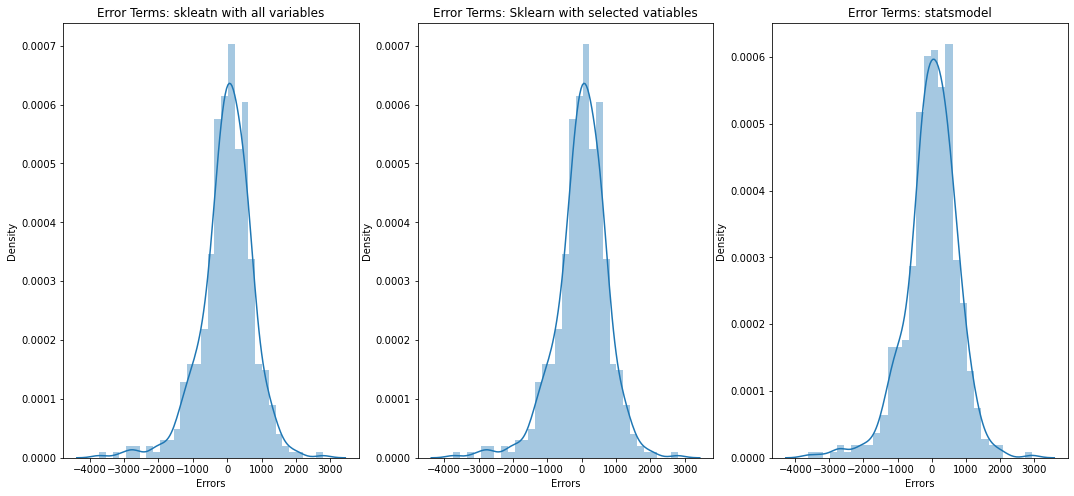

In [62]:
f, ax = plt.subplots(1,3, figsize=(18,8))

res_sk_1 = y_train - y_train_pred_sk_1
sns.distplot((res_sk_1), ax = ax[0])
ax[0].set_title('Error Terms: skleatn with all variables')
ax[0].set_xlabel('Errors')

res_sk_2 = y_train - y_train_pred_sk_2
sns.distplot(res_sk_1, ax = ax[1])
ax[1].set_title('Error Terms: Sklearn with selected vatiables')
ax[1].set_xlabel('Errors')

res_sm_1 = y_train - y_pread_train_sm_1
sns.distplot((res_sm_1), ax = ax[2])
ax[2].set_title('Error Terms: statsmodel')
ax[2].set_xlabel('Errors')

#### Calaulating R2 of all three models


In [63]:
r2_train_sk_1 = r2_score(y_train, y_train_pred_sk_1)
r2_train_sk_2 = r2_score(y_train, y_train_pred_sk_2)
r2_train_sm   = r2_score(y_train, y_pread_train_sm_1)

print("R Squared value of sk learn model with all variables is      :", r2_train_sk_1)
print("R Squared value of sk learn model with selected variables is :", r2_train_sk_2)
print("R Squared value of statsmodel with selected variables is     :", r2_train_sm)

R Squared value of sk learn model with all variables is      : 0.852671768124476
R Squared value of sk learn model with selected variables is : 0.8475864307244375
R Squared value of statsmodel with selected variables is     : 0.8475864307244374


#### Evaluating Models

#### Predicting using Test set

In [64]:
# Use model 1, sk learn all variables
# Use model 4, sk learn selected variables
# Use model 3, statsmodel selected variable

y_test_pred_sk_1 = lr_sk_1.predict(X_test_d)
y_test_pred_sk_2 = lr_sk_2.predict(X_test_rfe)
y_test_pred_sm   = lr_sm_2.predict(X_test_rfe_lm_1)

In [65]:
r2_test_sk_1 = r2_score(y_test, y_test_pred_sk_1)
r2_test_sk_2 = r2_score(y_test, y_test_pred_sk_2)
r2_test_sm   = r2_score(y_test, y_test_pred_sm)

print("R Squared value of sk learn model with all variables is      :", r2_test_sk_1)
print("R Squared value of sk learn model with selected variables is :", r2_test_sk_2)
print("R Squared value of statsmodel with selected variables is     :", r2_test_sm)

R Squared value of sk learn model with all variables is      : 0.8289287270951915
R Squared value of sk learn model with selected variables is : -0.22271445718672012
R Squared value of statsmodel with selected variables is     : 0.815877919521176


#### Conclusion
- The R squared value of sk learn model with all variables is marginally higher at 82.89 %
- The R squared value of sk learn model with selected variable is below accpetable range at -22%
- The R squared value of statsmodel.api model is 81.58
- This when compared with that of train model we can conclude that model created using sk learn library with all variables selected for modeling after EDA is the best model